### Problem Set: Marketing Measurements

**Situation**:  
The advertising team aims to explore a new digital channel. The initial focus is to asses the Ad performance in Germany 
**Task**:  
to devise a strategy for launching the new digital channel campaign in Germany, focusing on how to measure its effectiveness and impact in a data-driven manner.

**Action**:  
Devise a data-driven framework to measure the impact of the campaign by tracking key performance indicators (KPIs) such as Return on Ad Spend (ROAS), Cost per Acquisition (CPA), Click-Through Rate (CTR), and Conversion Rate.

**Result**:  
The advertising team should track **Return on Ad Spend (ROAS)** as the primary metric to measure how financially efficient the Ad campaign is. ROAS will provide insight into how much revenue is generated for each dollar spent on the new digital channel campaign.

We will estimate the **ROAS** metric, which is the product of the division between **Total Revenue** generated through ad campaigns and **Total Ad Spend**, comprising **Cost per Acquisition (CPA) Ad Spend** and **Cost per 1000 impressions (CPM) Ad Spend**.

If **ROAS** ≥ 1, it is worth increasing the Ad Spend, while if **ROAS** < 1, it indicates that the campaign is not performing profitably.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import and Read the data into a DataFrame

file_path = r"C:\Users\PC\Downloads\personal project - DF (1).csv"

df = pd.read_csv(file_path)

# Display the first few rows ensuring it is functioning 

print(df.head())

         Date  Berlin  Hamburg  Bremen  Leipzig  Munich  Stuttgart  Kenzgau  \
0  2022-01-01    2074      256     196      212     641          0      168   
1  2022-01-02     660       84     123       70     237          0       42   
2  2022-01-03     520       86     176       57     240          0       43   
3  2022-01-04     460      107     140       57     252          0       53   
4  2022-01-05     449      102     161       82     316          0       47   

   Dreseden  Dortmund  Duessldorf  Potsdam  Brandenburg  Flensburg  
0        23      1436         406      501         1716        387  
1        17       765          81      181          562        127  
2        13       748          92      185          579        148  
3        14       657         119      184          560        171  
4        12       666         138      241          762        207  


In [3]:
# Find out the DataFrame Shape (number of rows and columns)
df.shape

(546, 14)

In [4]:
# Check the columns' data types 
df.dtypes

Date           object
Berlin          int64
Hamburg         int64
Bremen          int64
Leipzig         int64
Munich          int64
Stuttgart       int64
Kenzgau         int64
Dreseden        int64
Dortmund        int64
Duessldorf      int64
Potsdam         int64
Brandenburg     int64
Flensburg       int64
dtype: object

In [5]:
# Get a Statistical Summary of the numerical columns 
df.describe()

,Berlin,Hamburg,Bremen,Leipzig,Munich,Stuttgart,Kenzgau,Dreseden,Dortmund,Duessldorf,Potsdam,Brandenburg,Flensburg
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,1154.510989,120.032967,326.294872,85.457875,438.119048,42.822344,176.386447,51.529304,1456.296703,150.437729,325.593407,962.706960,266.679487
std,400.139041,37.336835,99.001006,37.853836,144.507879,34.190824,88.767850,32.728184,386.060845,53.706378,133.158261,305.344579,96.026075
min,410.000000,53.000000,116.000000,31.000000,203.000000,0.000000,42.000000,7.000000,582.000000,66.000000,118.000000,425.000000,127.000000
25%,852.000000,94.000000,253.000000,61.250000,334.000000,23.000000,112.000000,29.000000,1186.000000,112.000000,222.000000,717.000000,198.000000
50%,1069.000000,110.000000,316.500000,74.000000,400.000000,34.000000,147.000000,42.000000,1405.000000,134.000000,288.500000,916.000000,243.000000
75%,1418.250000,137.750000,387.000000,101.000000,520.000000,55.750000,221.500000,65.000000,1681.750000,177.000000,405.000000,1118.500000,311.750000
max,2364.000000,276.000000,663.000000,441.000000,1059.000000,200.000000,545.000000,219.000000,2671.000000,406.000000,772.000000,2032.000000,657.000000


In [6]:
# Figure the total count of the null values 
df.isnull().sum()

Date           0
Berlin         0
Hamburg        0
Bremen         0
Leipzig        0
Munich         0
Stuttgart      0
Kenzgau        0
Dreseden       0
Dortmund       0
Duessldorf     0
Potsdam        0
Brandenburg    0
Flensburg      0
dtype: int64

In [7]:
df.isna().sum()

Date           0
Berlin         0
Hamburg        0
Bremen         0
Leipzig        0
Munich         0
Stuttgart      0
Kenzgau        0
Dreseden       0
Dortmund       0
Duessldorf     0
Potsdam        0
Brandenburg    0
Flensburg      0
dtype: int64

In [8]:
# Find out the outlier values 
from scipy import stats 
z_scores = np.abs(stats.zscore(df.iloc[:,1]))
print(z_scores)

0      2.300031
1      1.236981
2      1.587180
3      1.737266
4      1.764781
         ...   
541    0.414013
542    0.541586
543    0.426520
544    0.178879
545    0.699120
Name: Berlin, Length: 546, dtype: float64


It turned out that Berlin Values has the several outlier values but I choose to leave them as it is still central to the analysis

In [9]:
# Convert the data column into datatime data type
# 1. Convert the data type of the date column to date_time_formart
df['Date'] = pd.to_datetime(df['Date'])
# 2. Create two time columns derived from the date column for aggregating purpose, year-month & year
# 3. Then change their data type to str so it won't impact any of our numerical columns 
# 4. Indexing year-month for analysis purpose 
df['year'] = df['Date'].dt.year.astype(str)
df['year_month'] = df['Date'].dt.to_period('M').astype(str)
# 5. Reposition the year-month and year coulmns columns to the second and third columns 
year_month_col = df.pop('year_month') # remove the column from the DataFrame 
df.insert(2,'year_month',year_month_col) # reposition the column to the 3rd column position 
year_col = df.pop('year') # remove the year column 
df.insert(1,'year',year_col) # reposition the year column in the the 2nd column position

print(df.head()) # Post-modification Review


        Date  year  Berlin year_month  Hamburg  Bremen  Leipzig  Munich  \
0 2022-01-01  2022    2074    2022-01      256     196      212     641   
1 2022-01-02  2022     660    2022-01       84     123       70     237   
2 2022-01-03  2022     520    2022-01       86     176       57     240   
3 2022-01-04  2022     460    2022-01      107     140       57     252   
4 2022-01-05  2022     449    2022-01      102     161       82     316   

   Stuttgart  Kenzgau  Dreseden  Dortmund  Duessldorf  Potsdam  Brandenburg  \
0          0      168        23      1436         406      501         1716   
1          0       42        17       765          81      181          562   
2          0       43        13       748          92      185          579   
3          0       53        14       657         119      184          560   
4          0       47        12       666         138      241          762   

   Flensburg  
0        387  
1        127  
2        148  
3        171  

In [10]:
# Aggregate the x count by year-month  

unit_monthly_data = df.groupby('year_month',as_index=True).sum(numeric_only=True)
print(unit_monthly_data.head())

            Berlin  Hamburg  Bremen  Leipzig  Munich  Stuttgart  Kenzgau  \
year_month                                                                 
2022-01      21603     3982    6065     3083    9743          0     2887   
2022-02      27320     3387    5563     2479   10773          0     3419   
2022-03      32104     3207    8613     2667   11634       2731     4054   
2022-04      38842     3345    9351     2997   11465       2952     4474   
2022-05      42039     3383   11000     2612   14948       2617     4233   

            Dreseden  Dortmund  Duessldorf  Potsdam  Brandenburg  Flensburg  
year_month                                                                   
2022-01          586     25437        4409     7950        23215       6852  
2022-02          777     30664        3948     7675        21837       6766  
2022-03          957     36418        4437     8343        29317       6324  
2022-04          994     41302        4861     9257        29944       7262  

In [11]:
print(df.columns)

Index(['Date', 'year', 'Berlin', 'year_month', 'Hamburg', 'Bremen', 'Leipzig',
       'Munich', 'Stuttgart', 'Kenzgau', 'Dreseden', 'Dortmund', 'Duessldorf',
       'Potsdam', 'Brandenburg', 'Flensburg'],
      dtype='object')


C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


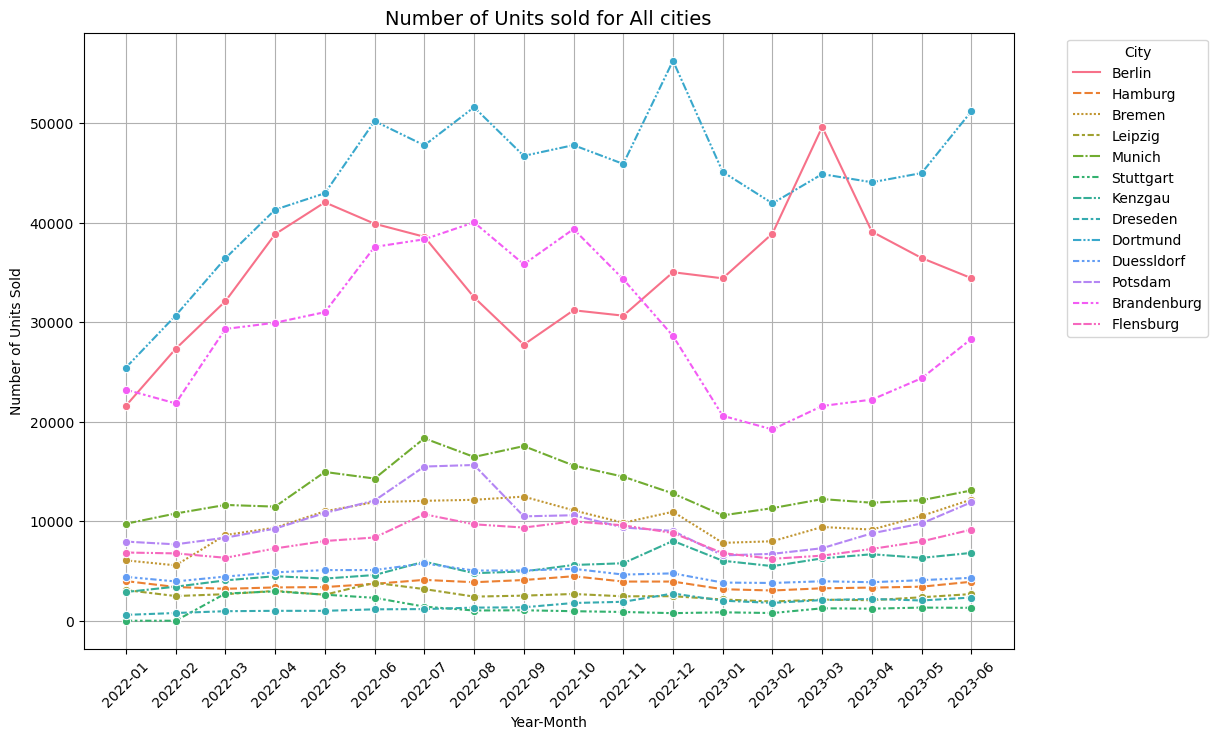

In [12]:
# Graph the total count of rides by Month 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12,8))
sns.lineplot(data=unit_monthly_data,marker='o')
plt.title('Number of Units sold for All cities',fontsize=14)
plt.xlabel('Year-Month',fontsize=10)
plt.ylabel('Number of Units Sold',fontsize=10)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='City',loc='upper left',bbox_to_anchor=(1.05,1))
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

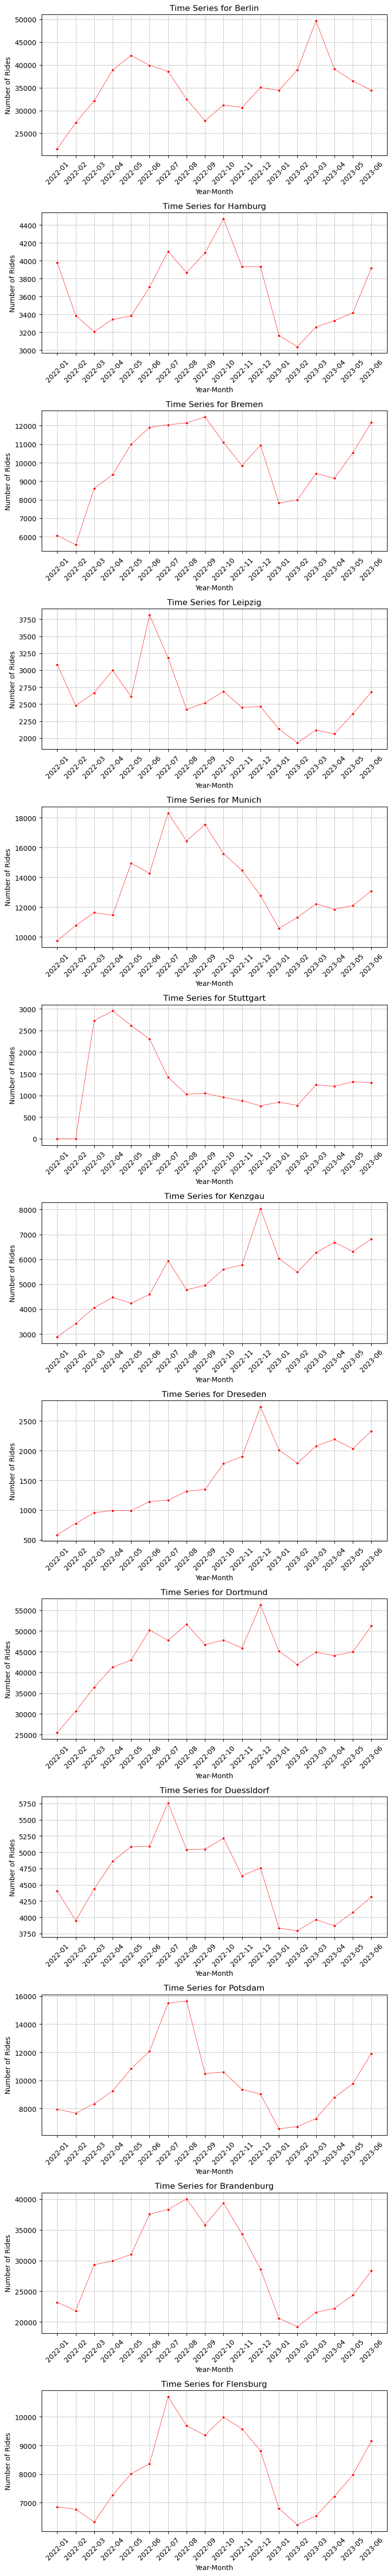

In [13]:
# Another Attempt to find the rides count breakdown by cities charted in subplots 
cities = unit_monthly_data.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(cities),ncols=1, figsize=(8,len(cities) * 4))
#Loop through each city and plot                         
for i, city in enumerate(cities):
    sns.lineplot(x=unit_monthly_data.index,
                 y=unit_monthly_data[city],
                 ax=axes[i],
                 linestyle='-',
                 marker='o',
                 markersize=4,
                 linewidth=0.5,
                 color='r')
    axes[i].set_title(f'Time Series for {city}')
    axes[i].set_xlabel('Year-Month')
    axes[i].set_ylabel('Number of Rides')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks
    axes[i].grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)  # Add grid lines
plt.tight_layout()
plt.show()

In [14]:
# To look into the statistics of the cities and their relevant rides count
# Step 1 Calculate the total, average, and median values (By aggregating the numeric values only so that the cities will be the index instead)
total_rides = unit_monthly_data.sum(numeric_only=True)
mean_rides = unit_monthly_data.mean(numeric_only=True)
median_rides = unit_monthly_data.median(numeric_only=True)
total_profit = total_rides * 6
average_profit = mean_rides * 6
# Step 2 Create a DataFrame with all three statistics 
cities_rides_data_stats = pd.DataFrame({
'Total Rides':total_rides,
'Total Revenue': total_profit,
'Mean Rides':mean_rides.round(2),
'Average Monthly Revenue' : average_profit.round(2),
'Median Rides':median_rides.round(2)
})                                
# Step 3 Sort the DataFrame by the total rides in desending order 
cities_rides_data_stats = cities_rides_data_stats.sort_values(by = 'Total Rides', ascending=False)

print(cities_rides_data_stats)


             Total Rides  Total Revenue  Mean Rides  Average Monthly Revenue  \
Dortmund          795138        4770828    44174.33                265046.00   
Berlin            630363        3782178    35020.17                210121.00   
Brandenburg       525638        3153828    29202.11                175212.67   
Munich            239213        1435278    13289.61                 79737.67   
Bremen            178157        1068942     9897.61                 59385.67   
Potsdam           177774        1066644     9876.33                 59258.00   
Flensburg         145607         873642     8089.28                 48535.67   
Kenzgau            96307         577842     5350.39                 32102.33   
Duessldorf         82139         492834     4563.28                 27379.67   
Hamburg            65538         393228     3641.00                 21846.00   
Leipzig            46660         279960     2592.22                 15553.33   
Dreseden           28135         168810 

In [15]:
# Step 1: Calculate Total Revenue on city level

rides_total_per_city = unit_monthly_data.sum()  # Calculate total rides per city
average_profit_per_ride = 6  # Average profit per ride
total_revenue_per_city = average_profit_per_ride * rides_total_per_city
conversion_rate_social_media = 0.05  # Conversion rate from social media ads (conservative appraoch)
total_rides_generated_socialmedia_city = conversion_rate_social_media * rides_total_per_city
total_revenue_generated_socialmedia_city = conversion_rate_social_media * total_revenue_per_city


# Step 2: Calculate the Total Ad Spend (Total Ad Spend = CPM Ad Spend (Impressions) + CPA Ad Spend (Conversion))

impressions_count = 100000  # Assume 100,000 impressions
average_cpm = 3  # Average CPM is 3 EUR per 1000 impressions
ctr = 0.02 # Average Click Through Rate

# Calculate Clicks Count (Click-Through Rate * Number of Impressions)
total_clicks = ctr * impressions_count 

# Calculate CPM
cpm = (impressions_count * average_cpm) / 1000

# Define cost per acquisition (CPA) assumptions
cpa_lower_bound = 6  # Lower CPA in EUR
cpa_upper_bound = 12  # Upper CPA in EUR
cost_per_acquisition_lower = total_clicks * cpa_lower_bound
cost_per_acqusition_upper = total_clicks * cpa_upper_bound


# Calculate total ad spend bounds using both CPM and CPA
total_ad_spend_lower_bound = cpm + cost_per_acquisition_lower
total_ad_spend_upper_bound = cpm + cost_per_acqusition_upper

# Step 3: Calculate ROAS
roas_lower_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_lower_bound).round(2)
roas_upper_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_upper_bound).round(2)

# Step 4: Create DataFrame summarizing rides, revenues, ad spend, and ROAS
total_revenue_rides_per_city = pd.DataFrame({
    'Total Rides per City': rides_total_per_city,
    'Total Revenue per City': total_revenue_per_city,
    'Estimated Rides from Ads': total_rides_generated_socialmedia_city,
    'Estimated Revenue from Ads': total_revenue_generated_socialmedia_city,
    'Estimated Ad Spend - Low Bound': total_ad_spend_lower_bound,
    'Estimated Ad Spend - High Bound': total_ad_spend_upper_bound,
    'Return on Ads - Lower Bound (CPA 6 EUR)': roas_lower_bound,
    'Return on Ads - Upper Bound (CPA 12 EUR)': roas_upper_bound,
})

# Step 5: Create recommendation based on ROAS values
def add_recommendation(roas):
    if roas >= 1:
        return "Eligible for Ad Spend Increase (Profitable or Breakeven)"
    else:
        return "Not Worth It (Below Breakeven)"

# Apply recommendation based on ROAS lower and upper bounds
total_revenue_rides_per_city['Recommendation - Lower Bound'] = total_revenue_rides_per_city['Return on Ads - Lower Bound (CPA 6 EUR)'].apply(add_recommendation)
total_revenue_rides_per_city['Recommendation - Upper Bound'] = total_revenue_rides_per_city['Return on Ads - Upper Bound (CPA 12 EUR)'].apply(add_recommendation)

# Display the final sorted DataFrame
print(total_revenue_rides_per_city.sort_values(by='Total Rides per City', ascending=False))


             Total Rides per City  Total Revenue per City  \
Dortmund                   795138                 4770828   
Berlin                     630363                 3782178   
Brandenburg                525638                 3153828   
Munich                     239213                 1435278   
Bremen                     178157                 1068942   
Potsdam                    177774                 1066644   
Flensburg                  145607                  873642   
Kenzgau                     96307                  577842   
Duessldorf                  82139                  492834   
Hamburg                     65538                  393228   
Leipzig                     46660                  279960   
Dreseden                    28135                  168810   
Stuttgart                   23381                  140286   

             Estimated Rides from Ads  Estimated Revenue from Ads  \
Dortmund                     39756.90                    238541.4   
Berlin 

***Scenario 3***: Taking More conservative approach in terms of conversion rate (2% instead of 5%) [CTR = Conversion Rate]

In [16]:
# Step 1: Calculate Total Revenue on city level

rides_total_per_city = unit_monthly_data.sum()  # Calculate total rides per city
average_profit_per_ride = 6  # Average profit per ride
total_revenue_per_city = average_profit_per_ride * rides_total_per_city
conversion_rate_social_media = 0.02  # Conversion rate from social media ads (conservative appraoch)
total_rides_generated_socialmedia_city = conversion_rate_social_media * rides_total_per_city
total_revenue_generated_socialmedia_city = conversion_rate_social_media * total_revenue_per_city


# Step 2: Calculate the Total Ad Spend (Total Ad Spend = CPM Ad Spend (Impressions) + CPA Ad Spend (Conversion))

impressions_count = 100000  # Assume 100,000 impressions
average_cpm = 3  # Average CPM is 3 EUR per 1000 impressions
ctr = 0.02 # Average Click Through Rate

# Calculate Clicks Count (Click-Through Rate * Number of Impressions)
total_clicks = ctr * impressions_count 

# Calculate CPM
cpm = (impressions_count * average_cpm) / 1000

# Define cost per acquisition (CPA) assumptions
cpa_lower_bound = 6  # Lower CPA in EUR
cpa_upper_bound = 12  # Upper CPA in EUR
cost_per_acquisition_lower = total_clicks * cpa_lower_bound
cost_per_acqusition_upper = total_clicks * cpa_upper_bound


# Calculate total ad spend bounds using both CPM and CPA
total_ad_spend_lower_bound = cpm + cost_per_acquisition_lower
total_ad_spend_upper_bound = cpm + cost_per_acqusition_upper

# Step 3: Calculate ROAS
roas_lower_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_lower_bound).round(2)
roas_upper_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_upper_bound).round(2)

# Step 4: Create DataFrame summarizing rides, revenues, ad spend, and ROAS
total_revenue_rides_per_city = pd.DataFrame({
    'Total Rides per City': rides_total_per_city,
    'Total Revenue per City': total_revenue_per_city,
    'Estimated Rides from Ads': total_rides_generated_socialmedia_city,
    'Estimated Revenue from Ads': total_revenue_generated_socialmedia_city,
    'Estimated Ad Spend - Low Bound': total_ad_spend_lower_bound,
    'Estimated Ad Spend - High Bound': total_ad_spend_upper_bound,
    'Return on Ads - Lower Bound (CPA 6 EUR)': roas_lower_bound,
    'Return on Ads - Upper Bound (CPA 12 EUR)': roas_upper_bound,
})

# Step 5: Create recommendation based on ROAS values
def add_recommendation(roas):
    if roas >= 1:
        return "Eligible for Ad Spend Increase (Profitable or Breakeven)"
    else:
        return "Not Worth It (Below Breakeven)"

# Apply recommendation based on ROAS lower and upper bounds
total_revenue_rides_per_city['Recommendation - Lower Bound'] = total_revenue_rides_per_city['Return on Ads - Lower Bound (CPA 6 EUR)'].apply(add_recommendation)
total_revenue_rides_per_city['Recommendation - Upper Bound'] = total_revenue_rides_per_city['Return on Ads - Upper Bound (CPA 12 EUR)'].apply(add_recommendation)

# Display the final sorted DataFrame
print(total_revenue_rides_per_city.sort_values(by='Total Rides per City', ascending=False))


             Total Rides per City  Total Revenue per City  \
Dortmund                   795138                 4770828   
Berlin                     630363                 3782178   
Brandenburg                525638                 3153828   
Munich                     239213                 1435278   
Bremen                     178157                 1068942   
Potsdam                    177774                 1066644   
Flensburg                  145607                  873642   
Kenzgau                     96307                  577842   
Duessldorf                  82139                  492834   
Hamburg                     65538                  393228   
Leipzig                     46660                  279960   
Dreseden                    28135                  168810   
Stuttgart                   23381                  140286   

             Estimated Rides from Ads  Estimated Revenue from Ads  \
Dortmund                     15902.76                    95416.56   
Berlin 

***Observation***: 
It is worth to note that with holding all variables and values fixed and changing only the conversion rate, the count of cities eligible for Ad Increase Spend is lesser than the 5% conversion rate Scenario, a higher conversion rate contributes into higher RAOS. That implicates the significance of targeting the people marketed to by demography, especially in terms of age. 


***Scenario 4***: To remove the CPM and find out how it will impact of the ROAS and recommendation based on.


In [17]:

# Step 1: Calculate Total Revenue on city level

rides_total_per_city = unit_monthly_data.sum()  # Calculate total rides per city
average_profit_per_ride = 6  # Average profit per ride
total_revenue_per_city = average_profit_per_ride * rides_total_per_city
conversion_rate_social_media = 0.02  # Conversion rate from social media ads (conservative appraoch)
total_rides_generated_socialmedia_city = conversion_rate_social_media * rides_total_per_city
total_revenue_generated_socialmedia_city = conversion_rate_social_media * total_revenue_per_city


# Define cost per acquisition (CPA) assumptions (CPA = total_clicks * CPA)
cpa_lower_bound = 6  # Lower CPA in EUR
cpa_upper_bound = 12  # Upper CPA in EUR

impressions_count = 100000  # Assume 100,000 impressions
average_cpm = 3  # Average CPM is 3 EUR per 1000 impressions
ctr = 0.02 # Average Click Through Rate

# Calculate Clicks Count (Click-Through Rate * Number of Impressions)
total_clicks = ctr * impressions_count 

cost_per_acquisition_lower = total_clicks * cpa_lower_bound
cost_per_acqusition_upper = total_clicks * cpa_upper_bound




# Step 3: Calculate ROAS
roas_lower_bound = (total_revenue_generated_socialmedia_city / cost_per_acquisition_lower).round(2)
roas_upper_bound = (total_revenue_generated_socialmedia_city / cost_per_acqusition_upper).round(2)

# Step 4: Create DataFrame summarizing rides, revenues, ad spend, and ROAS
total_revenue_rides_per_city = pd.DataFrame({
    'Total Rides per City': rides_total_per_city,
    'Total Revenue per City': total_revenue_per_city,
    'Estimated Rides from Ads': total_rides_generated_socialmedia_city,
    'Estimated Revenue from Ads': total_revenue_generated_socialmedia_city,
    'Estimated Ad Spend - Low Bound': total_ad_spend_lower_bound,
    'Estimated Ad Spend - High Bound': total_ad_spend_upper_bound,
    'Return on Ads - Lower Bound (CPA 6 EUR)': roas_lower_bound,
    'Return on Ads - Upper Bound (CPA 12 EUR)': roas_upper_bound,
})

# Step 5: Create recommendation based on ROAS values
def add_recommendation(roas):
    if roas >= 1:
        return "Eligible for Ad Spend Increase (Profitable or Breakeven)"
    else:
        return "Not Worth It (Below Breakeven)"

# Apply recommendation based on ROAS lower and upper bounds
total_revenue_rides_per_city['Recommendation - Lower Bound'] = total_revenue_rides_per_city['Return on Ads - Lower Bound (CPA 6 EUR)'].apply(add_recommendation)
total_revenue_rides_per_city['Recommendation - Upper Bound'] = total_revenue_rides_per_city['Return on Ads - Upper Bound (CPA 12 EUR)'].apply(add_recommendation)

# Display the final sorted DataFrame
print(total_revenue_rides_per_city.sort_values(by='Total Rides per City', ascending=False))


             Total Rides per City  Total Revenue per City  \
Dortmund                   795138                 4770828   
Berlin                     630363                 3782178   
Brandenburg                525638                 3153828   
Munich                     239213                 1435278   
Bremen                     178157                 1068942   
Potsdam                    177774                 1066644   
Flensburg                  145607                  873642   
Kenzgau                     96307                  577842   
Duessldorf                  82139                  492834   
Hamburg                     65538                  393228   
Leipzig                     46660                  279960   
Dreseden                    28135                  168810   
Stuttgart                   23381                  140286   

             Estimated Rides from Ads  Estimated Revenue from Ads  \
Dortmund                     15902.76                    95416.56   
Berlin 

***Observation***: 
As ROAS is about comparing Ad Spend against the total revenue generated through Ads campaigns to assess the Ads Campaign Performance, Cost per Acqusition is the key performance marketing metric to consider here. 
That Has been proven by removing the CPM component which meant to be impressions marketing metric, it did not impact the end result in terms of cities worth to increase Ad Spend on both CPA bounds.  
In seek of convenience we will solely include CPA as a proxy for Ads Spend 

***Scenario 5***: Increasing the CTR to 5% making it equal to conversion rate

In [18]:
# Step 1: Calculate Total Revenue on city level

rides_total_per_city = unit_monthly_data.sum()  # Calculate total rides per city
average_profit_per_ride = 6  # Average profit per ride
total_revenue_per_city = average_profit_per_ride * rides_total_per_city
conversion_rate_social_media = 0.05  # Conversion rate from social media ads (conservative appraoch)
total_rides_generated_socialmedia_city = conversion_rate_social_media * rides_total_per_city
total_revenue_generated_socialmedia_city = conversion_rate_social_media * total_revenue_per_city


# Step 2: Calculate the Total Ad Spend (Total Ad Spend = CPM Ad Spend (Impressions) + CPA Ad Spend (Conversion))

impressions_count = 100000  # Assume 100,000 impressions
average_cpm = 3  # Average CPM is 3 EUR per 1000 impressions
ctr = 0.05 # Average Click Through Rate

# Calculate Clicks Count (Click-Through Rate * Number of Impressions)
total_clicks = ctr * impressions_count 

# Calculate CPM
cpm = (impressions_count * average_cpm) / 1000

# Define cost per acquisition (CPA) assumptions
cpa_lower_bound = 6  # Lower CPA in EUR
cpa_upper_bound = 12  # Upper CPA in EUR
cost_per_acquisition_lower = total_clicks * cpa_lower_bound
cost_per_acqusition_upper = total_clicks * cpa_upper_bound


# Calculate total ad spend bounds using both CPM and CPA
total_ad_spend_lower_bound = cpm + cost_per_acquisition_lower
total_ad_spend_upper_bound = cpm + cost_per_acqusition_upper

# Step 3: Calculate ROAS
roas_lower_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_lower_bound).round(2)
roas_upper_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_upper_bound).round(2)

# Step 4: Create DataFrame summarizing rides, revenues, ad spend, and ROAS
total_revenue_rides_per_city = pd.DataFrame({
    'Total Rides per City': rides_total_per_city,
    'Total Revenue per City': total_revenue_per_city,
    'Estimated Rides from Ads': total_rides_generated_socialmedia_city,
    'Estimated Revenue from Ads': total_revenue_generated_socialmedia_city,
    'Estimated Ad Spend - Low Bound': total_ad_spend_lower_bound,
    'Estimated Ad Spend - High Bound': total_ad_spend_upper_bound,
    'Return on Ads - Lower Bound (CPA 6 EUR)': roas_lower_bound,
    'Return on Ads - Upper Bound (CPA 12 EUR)': roas_upper_bound,
})

# Step 5: Create recommendation based on ROAS values
def add_recommendation(roas):
    if roas >= 1:
        return "Eligible for Ad Spend Increase (Profitable or Breakeven)"
    else:
        return "Not Worth It (Below Breakeven)"

# Apply recommendation based on ROAS lower and upper bounds
total_revenue_rides_per_city['Recommendation - Lower Bound'] = total_revenue_rides_per_city['Return on Ads - Lower Bound (CPA 6 EUR)'].apply(add_recommendation)
total_revenue_rides_per_city['Recommendation - Upper Bound'] = total_revenue_rides_per_city['Return on Ads - Upper Bound (CPA 12 EUR)'].apply(add_recommendation)

# Display the final sorted DataFrame
print(total_revenue_rides_per_city.sort_values(by='Total Rides per City', ascending=False))


             Total Rides per City  Total Revenue per City  \
Dortmund                   795138                 4770828   
Berlin                     630363                 3782178   
Brandenburg                525638                 3153828   
Munich                     239213                 1435278   
Bremen                     178157                 1068942   
Potsdam                    177774                 1066644   
Flensburg                  145607                  873642   
Kenzgau                     96307                  577842   
Duessldorf                  82139                  492834   
Hamburg                     65538                  393228   
Leipzig                     46660                  279960   
Dreseden                    28135                  168810   
Stuttgart                   23381                  140286   

             Estimated Rides from Ads  Estimated Revenue from Ads  \
Dortmund                     39756.90                    238541.4   
Berlin 

***Observation***: If CTR and conversion rate is equal, the recommendation tool with recommend the cities' name and count. Having CTR and conversion rate equal, it means we have very highly effective targeting Ad Camapaign, which is bit unrealistic. 

***Scenario 6***: Removing CPM, CTR = 5% and Conversion Rate = 3% (Assuming a 60 % amount of the clicks will be converted) 

In [19]:
# Step 1: Calculate Total Revenue on city level

rides_total_per_city = unit_monthly_data.sum()  # Calculate total rides per city
average_profit_per_ride = 6  # Average profit per ride
total_revenue_per_city = average_profit_per_ride * rides_total_per_city
conversion_rate_social_media = 0.03  # Conversion rate from social media ads (conservative appraoch)
total_rides_generated_socialmedia_city = conversion_rate_social_media * rides_total_per_city
total_revenue_generated_socialmedia_city = conversion_rate_social_media * total_revenue_per_city


# Step 2: Calculate the Total Ad Spend (CPA (performance))

impressions_count = 100000  # Assume 100,000 impressions
average_cpm = 3  # Average CPM is 3 EUR per 1000 impressions
ctr = 0.05 # Average Click Through Rate

# Calculate Clicks Count (Click-Through Rate * Number of Impressions)
total_clicks = ctr * impressions_count 


# Define cost per acquisition (CPA) assumptions
cpa_lower_bound = 6  # Lower CPA in EUR
cpa_upper_bound = 12  # Upper CPA in EUR
cost_per_acquisition_lower = total_clicks * cpa_lower_bound
cost_per_acqusition_upper = total_clicks * cpa_upper_bound


# Calculate total ad spend bounds using both CPM and CPA
total_ad_spend_lower_bound = cpm + cost_per_acquisition_lower
total_ad_spend_upper_bound = cpm + cost_per_acqusition_upper

# Step 3: Calculate ROAS
roas_lower_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_lower_bound).round(2)
roas_upper_bound = (total_revenue_generated_socialmedia_city / total_ad_spend_upper_bound).round(2)

# Step 4: Create DataFrame summarizing rides, revenues, ad spend, and ROAS
total_revenue_rides_per_city = pd.DataFrame({
    'Total Rides per City': rides_total_per_city,
    'Total Revenue per City': total_revenue_per_city,
    'Estimated Rides from Ads': total_rides_generated_socialmedia_city,
    'Estimated Revenue from Ads': total_revenue_generated_socialmedia_city,
    'Estimated Ad Spend - Low Bound': total_ad_spend_lower_bound,
    'Estimated Ad Spend - High Bound': total_ad_spend_upper_bound,
    'Return on Ads - Lower Bound (CPA 6 EUR)': roas_lower_bound,
    'Return on Ads - Upper Bound (CPA 12 EUR)': roas_upper_bound,
})

# Step 5: Create recommendation based on ROAS values
def add_recommendation(roas):
    if roas >= 1:
        return "Eligible for Ad Spend Increase (Profitable or Breakeven)"
    else:
        return "Not Worth It (Below Breakeven)"

# Apply recommendation based on ROAS lower and upper bounds
total_revenue_rides_per_city['Recommendation - Lower Bound'] = total_revenue_rides_per_city['Return on Ads - Lower Bound (CPA 6 EUR)'].apply(add_recommendation)
total_revenue_rides_per_city['Recommendation - Upper Bound'] = total_revenue_rides_per_city['Return on Ads - Upper Bound (CPA 12 EUR)'].apply(add_recommendation)

# Display the final sorted DataFrame
print(total_revenue_rides_per_city.sort_values(by='Total Rides per City', ascending=False))


             Total Rides per City  Total Revenue per City  \
Dortmund                   795138                 4770828   
Berlin                     630363                 3782178   
Brandenburg                525638                 3153828   
Munich                     239213                 1435278   
Bremen                     178157                 1068942   
Potsdam                    177774                 1066644   
Flensburg                  145607                  873642   
Kenzgau                     96307                  577842   
Duessldorf                  82139                  492834   
Hamburg                     65538                  393228   
Leipzig                     46660                  279960   
Dreseden                    28135                  168810   
Stuttgart                   23381                  140286   

             Estimated Rides from Ads  Estimated Revenue from Ads  \
Dortmund                     23854.14                   143124.84   
Berlin 

***Observation***: On the lower bound of Ad Spend, we have 6 cities worth to further increase the Ad Spend (Dortmund, Berlin, Brandenburg, Munich, Bremen and Potsdam). \
On the upper bound of Ad Spend, 3 cities from the same list worth to raise the Ad Spend (Dortmund, Berlin and Brandenburg)
This scenario tends to be the most practical to follow in this regard. 

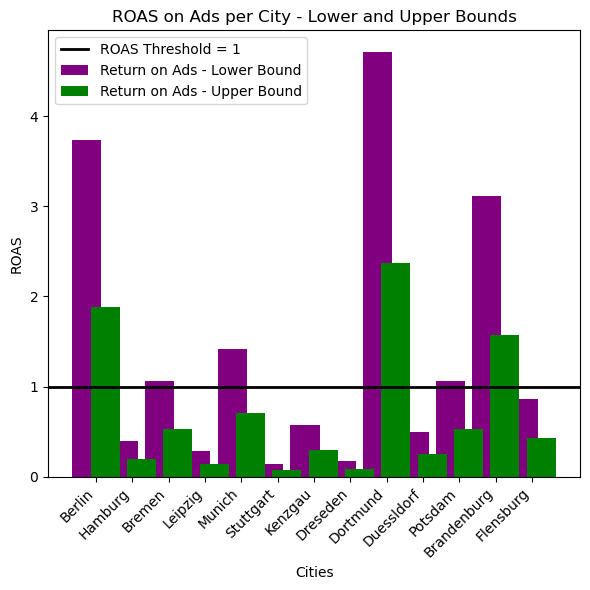

In [20]:
# Create Bar Chart representing the ROAS of each city on both bounds 

# Step 1 extract city names by lower and upper bounds 

cities = total_revenue_rides_per_city.index 
roas_lower_bound = total_revenue_rides_per_city['Return on Ads - Lower Bound (CPA 6 EUR)']
roas_upper_bound = total_revenue_rides_per_city['Return on Ads - Upper Bound (CPA 12 EUR)']

#Step 2 set the bar shape 

bar_width = 0.5
x = np.arange(len(cities)) # Setting the cities on the x-axis 

#Step 3 create the bar chart 

fig, ax = plt.subplots(figsize=(6,6))
bars1 = ax.bar(x - bar_width/2, roas_lower_bound, label = 'Return on Ads - Lower Bound', color = 'purple') # for the Lower bound bars
bars2 = ax.bar(x+ bar_width/2, roas_upper_bound, label = 'Return on Ads - Upper Bound', color = 'green') # for the upper bound bars 
plt.axhline(y=1,color='black', linestyle='-',linewidth=2, label = 'ROAS Threshold = 1') # ROAS Threshold Solid Line

# Step 4 Add labels 

ax.set_xlabel('Cities')
ax.set_ylabel('ROAS')
ax.set_title('ROAS on Ads per City - Lower and Upper Bounds')
ax.set_xticks(x)
ax.set_xticklabels(cities,rotation=45, ha="right")
ax.legend()

# Step 5 
plt.tight_layout()
plt.show()

## 4. To validate the data-driven framework
Assuming we had a similar Ad Campaign in May 2023 on one the social media platforms
We can check the cities' rides count between April and May and how they are changed based on the ad campaign launched in May 2023.


In [21]:
# For readiness, we will change the index format of month-data index to Y-M 

unit_monthly_data.index = pd.to_datetime(unit_monthly_data.index).strftime('%Y-%m')

# Step 1 extract the data from April and May 2023 - Revenue and Rides count generated through ad campaign

apr_may_data = unit_monthly_data.loc[['2023-04','2023-05']] * conversion_rate_social_media

#Step 2 Since the cities are the column names and the month-year is the index, we will need to transpose them to find out the impact of the ad campaign

apr_may_data_transposed = apr_may_data.T # By that the cities become the index that we will aggregate the data by

# Step 3 we will calculate the difference between Augst and Sep by rides count 

apr_may_data_transposed['Change'] = apr_may_data_transposed['2023-05'] - apr_may_data_transposed['2023-04']
apr_may_data_transposed['Change Rate in %'] = ((apr_may_data_transposed['Change'] / apr_may_data_transposed['2023-04'] * 100).round(2))

#Step 4 caclulate the total profit by mutliply the average profit of 6 EUR and the rides count in April and May 2023

average_profit_per_trip = 6 # define the average profit per trip variable 
apr_may_data_profit = average_profit_per_trip * apr_may_data_transposed
apr_may_data_transposed['2023-04 Profit'] = average_profit_per_trip * apr_may_data_transposed['2023-04']
apr_may_data_transposed['2023 - 05 Profit'] = average_profit_per_trip * apr_may_data_transposed['2023-05']

#Step 5 We will calculate the change rate by dividing the change by the cities rides count in Aug 2023

apr_may_data_transposed['Profit Change'] = apr_may_data_profit['2023-05'] - apr_may_data_profit['2023-04']
apr_may_data_transposed['Profit Change Rate in %'] =((apr_may_data_transposed['Profit Change'] / apr_may_data_profit['2023-04'] * 100).round(2))
print(apr_may_data_transposed.sort_values(by='2023-05',ascending=False))

year_month   2023-04  2023-05  Change  Change Rate in %  2023-04 Profit  \
Dortmund     1321.71  1349.49   27.78              2.10         7930.26   
Berlin       1172.79  1093.32  -79.47             -6.78         7036.74   
Brandenburg   666.66   731.01   64.35              9.65         3999.96   
Munich        355.65   363.30    7.65              2.15         2133.90   
Bremen        274.71   315.96   41.25             15.02         1648.26   
Potsdam       263.49   293.13   29.64             11.25         1580.94   
Flensburg     216.42   239.16   22.74             10.51         1298.52   
Kenzgau       200.40   189.36  -11.04             -5.51         1202.40   
Duessldorf    116.07   122.28    6.21              5.35          696.42   
Hamburg        99.87   102.57    2.70              2.70          599.22   
Leipzig        61.86    70.74    8.88             14.35          371.16   
Dreseden       65.67    60.99   -4.68             -7.13          394.02   
Stuttgart      36.36    3

In [22]:
# To find out the List of cities where ROAS - Ad Spend on Lower and Upper Bounds:

roas_lower_bound_cities = total_revenue_rides_per_city[total_revenue_rides_per_city['Return on Ads - Lower Bound (CPA 6 EUR)'] >= 1]
roas_upper_bound_cities = total_revenue_rides_per_city[total_revenue_rides_per_city['Return on Ads - Upper Bound (CPA 12 EUR)'] >= 1]

# To find out the list of cities with positive profit change rate (based on the May 2023 ad campaign)

cities_with_positive_profit_change_rate = apr_may_data_transposed[apr_may_data_transposed['Profit Change Rate in %'] >= 1]

# To find our the matching cities between Cities with ROAS lower bound and positive profit changes

matching_cities_ROAS_lower_bound = list(set(roas_lower_bound_cities.index).intersection(set(cities_with_positive_profit_change_rate.index)))
matching_cities_ROAS_upper_bound = list(set(roas_upper_bound_cities.index).intersection(set(cities_with_positive_profit_change_rate.index)))


print(matching_cities_ROAS_lower_bound)
print(matching_cities_ROAS_upper_bound)


['Brandenburg', 'Bremen', 'Potsdam', 'Munich', 'Dortmund']
['Brandenburg', 'Dortmund']


### ***Finding***: 
To a great extend, using our data-driven framework will help with assessing the Ad Spend performance based on the ROAS value. By calculating the ROAS based on 18-month data (Jan 2022 - July 2023), it is clear that we have increase the Ad Spend in 6 out of the 13 cities we have here.
